In [ ]:
import rg
from rg.diagrams import diagram, composition_diagram, diagram_set
from rg.interaction import interaction as J 
from rg.interaction import interaction_identity
from rg.interaction import interaction_system
from rg.interaction import composite_interaction as G
from rg.theory import ftheory
from rg.graphs import composite_interaction_graph as fgraph

# Example representations
Here we show the matrix form for adding fields for arbitrary number of species (1 row per species). We display the latex symbols and also the diagrams

The diagrams are of the residuals so loops/internal structure are not shown here (see the composite examples later where we look at internal structure). 

The & operator or * operator (todo) are both used as diagram products allowing diagrams to be merged

In [ ]:
j = J([[1,1], 
       [2,0]])
j

In [ ]:
j.diagram

In [ ]:
transmutation = J([[1,0],[0,1]])
transmutation.diagram

In [ ]:
coagulation = J([[2,1],[0,0]])
coagulation.diagram

In [ ]:
branching = J([[1,2],[0,0]])
branching.diagram
#branching

In [ ]:
#branching.tensor

In [ ]:
(branching&coagulation).diagram

In [ ]:
(coagulation&branching).diagram

In [ ]:
(branching&j).diagram

# Dimensional Analysis
For dimensional analysis one construct a system of terms, each term is an interaction J.

One proposes known coupling values e.g. known dimensions of propagators 

the ftheory class permutes all non fixed couplings, proposing that permutations P(n,k) are dimensionless - each permutation creates a theory

A theory fixes the dimension of fields and all couplings. The theories can then be compared and chcked via the ftheory class

In [ ]:
#blank -> tilde
#BRW0
interactions = [
 J([[1,1],[0,0]]),
 J([[0,0],[1,1]]),
 J([[1,0],[0,1]]), #tau 
 J([[1,2],[0,0]]), #s
 J([[1,1],[0,1]]), #quasi-branch sigma
 J([[1,1],[1,1]]), #kappa
 J([[1,0],[1,1]]), #lambda
 ]

#BWS1 - #add two more terms chi and eta
interactions = interactions +  [
 J([[0,1],[1,2]]), #
 J([[1,0],[1,2]]), #   
]

#VRS - add two more terms annhilation
interactions = interactions +  [
 J([[1,1],[1,0]]), #
 J([[2,1],[0,1]]), #   
]

#display
[j.display() for j in interactions]

In [ ]:
Lambda = rg.T**(-1) # L**(-1*dim)
new_couplings = {J([ [0,0],  [1,1]] ): Lambda, #[field]*lambda is the inverse measure
                 J([ [1,1],  [0,0]] ): Lambda, }

#example theory
FT = ftheory(new_couplings, 
             dimensionless=[J([ [1,2],  [0,0]] ), 
                            J([ [1,1],  [0,1]] )  ])
FT.display()

In [ ]:
FT.interpret_dimensions(interactions)

In [ ]:
FT.interpret_couplings(interactions, l_power_dim=4)

In [ ]:
#we can create a bunch of theories by permuting dimensionless couplings given the input known field dimensions and all terms
cs  = ftheory.theories(interactions, new_couplings)

In [ ]:
import pandas as pd
dfs = []
for k in cs:
    M = k.interpret_couplings(interactions)
    df = pd.DataFrame(M.tolist(), columns=["vertex", "coupling"]).set_index("vertex")
    dfs.append(df)
dfs = pd.concat(dfs,axis=1).reset_index()
from sympy import Matrix
Matrix(dfs.as_matrix())
#dfs[0]

In [ ]:
ftheory.matrices(cs).dimensionless_terms().T

In [ ]:
#we can display a matrix for all theories for the values of the fields \phi_0, \tilde{\phi}_0, \phi_1, \tilde{\phi_1}
ftheory.matrices(cs).general_form
#below terms are in the form ud+v
#propagators always compensate each other in d=0 - that means i think they are rate-like
#you never have something that is just a positive v without some u? 
#you sometimes but rarely have any positive u
#For u,v; 0,0 always goes with -1,0
#you only have powers of 2 for u,v
#d dependence for creation or annihilation fields mostly agree between species - 
#  - if i was think of this as some sort of polarity - i want the two species to maybe agree
#  - that way propagation between species (transmutation) is as 'well behaved' as the bare propagators (so to speak)
#  - specifically i mean if u > 0 or v > 0 for one species, must be the same for the other

#todo - what do all the degenerate theories have in common (including/not including the non integer and negative dimensions)
#i notice two of the theories are exactly the same below too e.g. 1 and 3 which is weird but this explains the negatives 
#  - maybe it is the same thing actually
#from the measure, we know that we will have u,v = 1,2 (or negateive on the RHS).
#  -  Therefore, we know that we need at least +u and v cancelling the 2 - this creates our baseline

In [ ]:
# from itertools import product

# M = [0,1,2,3]
# def multiradix_product(M):
#     return product(*(range(x) for x in M))

# list(multiradix_product(M))
# #for a in multiradix_recursive(M):print(a)

In [ ]:
#and we can evalaute the values at a certain d, last column is the inverse measure L^dT^1 with T=L^2 at d=d_c
ftheory.matrices(cs).criterion(4)

# Composing and displaying diagrams
Work in progress. Lots of different ways to render things - starting with the basics, the ones that make development clearer.

In [ ]:
G(branching)*G(coagulation)

In [ ]:
T = G(branching)*G(transmutation)*G(j)
#composition_diagram(G(branching)*G(coagulation),compact=True)
T

In [ ]:
composition_diagram(T,compact=True)
#todo - draw on the residue stubs in dotted lines - use the same logic with angles around the vertex for the remaining dudes

In [ ]:
#def vertex_residual_contribution(self):[t.sum() for t in self.tensor]
T = G(branching)*G(transmutation)
T =  G(branching)*G(transmutation)*G(j)
FG = fgraph(T,True)#.betti_number()
FG

In [ ]:
FG.graph_polynomials()

In [ ]:
T0 = G(branching)*G(transmutation)
T0

In [ ]:
collection = [G(branching)*G(transmutation),
             G(branching)*G(coagulation),
             G(branching)*G(transmutation)*G(j)]
diagram_set(collection)

In [ ]:
collection = [G(branching)*G(transmutation),
             G(branching)*G(coagulation),
             G(branching)*G(transmutation)*G(j)]
collection = [c for c in collection if fgraph(c).is_1PI]
diagram_set(collection)

In [ ]:
collection[-1].residual_interaction.diagram

## Permutations

In [ ]:
#interactions[2:]

In [ ]:
import itertools,functools

def _combine(set_of_interactions):
        def _merge(a,b): 
            if a is None:return b
            if b is None:return a
            return a * b
        return functools.reduce(_merge, set_of_interactions, None)
    
def graph_permutations(primitives, loop_orders = [0,1], max_k=3):
    if not isinstance(loop_orders, list):loop_orders = [loop_orders]
    l = [] 
    
    for i in range(2,max_k+1):
        for tup in list(itertools.permutations(primitives,i)):
            res = _combine(list(tup))
            if res.loops in loop_orders:
                l.append(res)
    #todo : define uniqueness and validity
    return list(set(l))

#simple sample system
res = graph_permutations([G(branching), G(transmutation),G(coagulation),G(j)])
#our vicious walker system
res = graph_permutations([G(j) for j in interactions[2:]])

len(res)

In [ ]:
def distinct_loops(fgset,insist_on_same_residual=False):
    #I think only the same residual makes sense because otherwise the external momenta are different? but then its the same graph so maybe not
    d = {}
    for f in fgset:
        if f.loops < 1:continue
        inv_res = f.residual_complement
        inv_res.flags.writeable = False
        h = hash(str(inv_res))
        if h not in d:d[h] = []
        d[h].append(f)
    return d

In [ ]:
d = distinct_loops(res)
len(d)

In [ ]:
def loop_integral(T, propagator_matrix):
    pass
    #number edges and create a detail matrix with the momenta and so on at each edge
    #T.display_loop(extra_props={})

In [ ]:
#bits and pieces: pressing matter: momenta specification for different residuals on some loop. 
#issue with a direction of a loop arc
#need to pass scales down to render so we can shrink down diagrams in sets
#need a smarted key rendering and also a type-specific way to do it i.e. create a composite from the loop data only with proper fidelity - or maybe that is not important
#maybe sub class it to cut out the residual data or not display and change the hash - actually maybe a good idea to start outting the loop logic with propagators etc?
#    im not sure if the external momenta for different residuals matters though - I feel like it should (maybe we only care about 3-leg though)
#also high level (module level @ rg) functions to do all this permutation and filtering and grouping stuff
diagram_set(list(d.values())[9],offset=120,compact=True)

In [ ]:
diagram_set([G(j) for j in interactions[2:]])

In [ ]:
#iteratively find all tree-level new residuals
#this is a bit messy at the moment, I am still deciding how to organise this stuff
l = 0
res_dict = {}
basis = [G(j) for j in interactions[2:]]
for b in basis:
    res_dict[b.residual_interaction] = True
print("basis init length", len(basis))
temp = graph_permutations(basis, loop_orders=[0], max_k=2)
#this would be a recursive step
for b in temp:
    resid = b.residual_interaction
    if resid.tensor.sum() <= 4:
        res_dict[resid] = True
basis = [G(j) for j in res_dict.keys()]
len(basis)

In [ ]:
temp = graph_permutations(basis, loop_orders=[0], max_k=2)
#this would be a recursive step
for b in temp:
    resid = b.residual_interaction
    if resid.tensor.sum() <= 3:
        res_dict[resid] = True
basis = [G(j) for j in res_dict.keys()]
len(basis)

In [ ]:
diagram_set(basis)

In [ ]:
generated_diags = graph_permutations(basis, loop_orders=[0,1], max_k=3)
len(generated_diags)

In [ ]:
#diagram_set(generated_diags)

In [ ]:
filtered = []
for _r in generated_diags:
    r = fgraph(_r)
    if r.is_1PI and r.betti_number() < 2:
        filtered.append(_r)
len(res), len(filtered)

#having_residual()
filtered = [f for f in filtered if f.residual_interaction == interactions[0]]
#hacing residual subset
print(len(filtered))

In [ ]:
diagram_set(set(filtered))# todo , group by residual, each residual on columns and the most popular one on the left

In [ ]:
FG = filtered[0]

In [ ]:
#takes tese examples which are sufficient to show some intereting loops
#define the propagators using the residual complement
filtered[1].residual_complement

# Distinct Loops

In [ ]:
#suppose we can group by something else afterwards e.g. residual equivalence - which contribute to renormalisation of say, propagators
#now we just need to determine the internal loop structure
#once we have distinct loops (worrying about the residuals later) we can construct the integrals
#the integrals will be a combination of propagators, possible with some interaction numerators
#1. ignoring the numerators for the moment, I can construct the reduced "euclidean" propagators 
#2. most of them can be mapped onto a Gamma function easily enough using the alpha-param
#3. return to numerators and dimensional analysis and power counting stuff
#4. then we are on to Rz

In [17]:
import sympy
from sympy import sympify
from sympy import Symbol
from sympy import Matrix
from sympy import init_printing
from sympy import latex
sympy.init_printing()
P0,D1,x, p=symbols("P_0 d_1 x p")
P0

In [24]:
IG = (1+D1*x)**(-1*p) 
IG

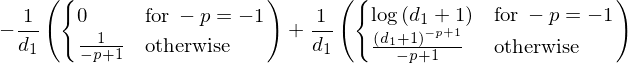

In [26]:
sympy.integrate(IG,(x,0,1))

In [ ]:
#this is when we map to alpha-form after k form in the simple case where there are only two terms. if only one term, then we are done already. if more, need to think about how this works
#if p is the power < 0,
#general form is (R(1-p))^{-1} * [(R+1)^{1-p} - 1]

In [9]:
#fintergral reduces a complex expression down to a _pterm_ that can be evaluated formulaically to Gamma functions - to this tonight because its easy
#in the forms, there is analysis of causal momenta followed by isotropic k-momenta followed by mass propagation; for each there is a group action that updates the phase space
class fintegral(object):   
    #this is the main guy - the assumption is we have reduced an f_integral down to a primitive simple form that can be easily evaluated
    class _pterm_(object):
        #parse out each term so that we know its power etc.
        #props may take limiting values e.g. epsilons
        def __init__(self, s, props={}):
            pass
        
        @property #keep track of what integrations still need to be done such as K radial, x1, x2 etc.
        def intergration_measure_terms(self):pass
            
        def __with_isolated_momentum__(self, p):pass
        
        def __fg_form__(self):pass #test method when we have x measures - the delta function integration at least for one x is A^(-1) [g-f(x)]^(p+1) - not sure how that factors for multiple edges/dummys
        
        #normal form: collect K coefficients, and normalise the masses 
        #for x integrations, deal with the same case as an exception - create the fg_form
        #study the more general form
        
    
    ####################
    def __init__(self, integrand, props = {}):
        self._integrand = self.__in_k__(integrand)        
    
    def __in_k__(self):
        #might move this to where we deal with propagators in terms of choice of momenta? omegas might need some treeatment too although looks easier
        #complete the squares is a special case here but think more generally about translation invariance
        #for each simple term, i should isolate mementum squared from mass
        pass

    
    @property
    def terms(self):  pass 
        #.as_ordered_factors()
    @property
    def uv_convergent_terms(self):  pass
    @property
    def is_simple(self):
        """Must have nothing in the numerator and be a power of single prop term"""
        pass
    @property
    def is_simple_product(self):pass
    @property
    def as_gamma_functions(self):pass
    
    def in_parametric_form(self, type_=0):pass
    
    #i can do the K integration if I am simple, and then i may have to do an x integration(s)
    
    def __repr__(self):  return self._repr_latex_()  
    def _repr_latex_(self): return latex(self._integrand,  mode='inline')
    
    

# Propagators

In [37]:
from sympy import Symbol, symbols
from IPython.display import display, Math, Latex
import itertools
from functools import reduce
from operator import add,mul
import numpy as np
class cpropagator(object):
    def __init__(self, pid=0, power=1,causal_type=1, D=0, show_subscript=True, use_compact_symbols=False ):
        w,k,  = symbols("\omega k")
        qual = str(pid) if show_subscript else ""
        m = Symbol("m"+qual)
        D = Symbol("D"+qual)
        A = Symbol("A"+qual)
        self.Pinv = causal_type*I*w+D*k**2+m if use_compact_symbols==False else -I*w+A
        self._pole = solve(self.Pinv, Symbol("\omega"))[0]
        self.Pinv = self.Pinv**power
        self._pole_order = power
        self._causal_type = causal_type
    def display(self):return self.Pinv**-1   
    
    #todo - define equality on Pid and causality so that we can make basis sets
    @property
    def value(self): return self.Pinv**-1
    @property
    def pole(self): return self._pole
    @property
    def pole_order(self): return self._pole_order
    @property
    def causal_type(self): return self._causal_type
    def __repr__(self):  return self._repr_latex_()  
    def _repr_latex_(self):   return latex(self.display(),  mode='inline')
    
    def __ab_ratio_alpha_representation__(self):
        #if there is a k, get the coefficient of k and leave that instead of 1 - idea is that we can integrate that out and then do the alpa integration
        #assert that there are two terms in self
        #we can get the ordered ratio of B/(A-B) and rewrite with the alpha parameter
        
        #assume A or AB
        #1. find k coefficients after doing the A-B
        #2. find the propagator ratio, note p
        #at this point Rx can be a complicated polynomial inside the K form and we may have to find some good tricks to dealwith it algebraically
        #3. write down the integral result 
        pass
    
    def _pset__():
        pass #some helper to make sets but compact into powers of propagators - that way we can ask for combinations of higher orders but limit types with k
    
    def __display__(pset):
        return [p.display() for p in pset]
    
    def generate_propagator_basis(n,power=1,combination_order=1,filter_loop_degenerates=True,for_display=False):
        """alot going on here - we can choose n distinct or n of k types of propagators 
        - we can combine them into products of propagators which are compacted into powers leading to multiple poles"""
        Ps = []
        for i in range(n):
            for p in range(0,power):
                for causality in [-1,1]: Ps.append(cpropagator(i, power=p+1, causal_type=causality))
         
        L =  Ps#list(itertools.chain(*Ps))
        if len(L) < combination_order:  combination_order = len(L)
        if combination_order == 1:  return [cpropagator.__make_list__(L,for_display)] #make it a list of lists for consistency
        else:
            res = []
            for i in range(2,combination_order+1):
                combo = list(itertools.combinations(L,i))#[t for t in  ]
                #i think this is where i check they are non degenerate i.e. cannot all have the same causal type if they are to be in a loop by momentum conservation
                combo = [cpropagator.__make_list__(c,for_display) for c in combo  ]#if not cpropagator.__is_degenerate_loop__(c)
                
                res.append(combo)
            return res
    
    def __make_list__(pset,display):
        return list(pset) if not display else cpropagator.__display__(pset) 
        
    def __is_degenerate_loop__(pset):
        return len(np.unique([c.causal_type for c in pset])) == 1      
    
    def __eval_combinations__(combinations):
        res_set = []
        for order in combinations:
            res = []
            for pset in order:  
                #we add the sum of residues knowing terms in the definition cancels with integration measure
                res.append(reduce(operator.add, [r["integration"] for r in cpropagator.residues(pset)], 0))
            res_set.append(res)
        return res_set
       
    def residues(pset,return_smallest=True):
        W = Symbol("\omega")
        def _diff_(s,o):return s
        def sum_poles(st): return np.sum([p["order"] for p in st])
            
        sets = {1:[], -1:[]}
        residual_base = reduce(operator.mul, [p.value for p in pset], 1)
        for p in pset:
            d = {"pole":p.pole}
            d["order"] = p.pole_order
            d["residual"] = simplify(residual_base / p.value)
            #generally we take the mth derivitive of g and evaluate there, where m is pole order
            if p.pole_order > 1:d["residual"]= diff(d["residual"],W,n=p.pole_order)
            d["causal_type"] = p.causal_type
            d["integration"] = d["residual"].subs(W,p.pole)
            sets[d["causal_type"]].append(d)
        #this could become a more complex choice; maybe if the smaller set gives rise to imaginary derivs/residuals I dont want them?
        #unless by some cheeky invariance argument i can ignore the causality here - but I doubt it.
        #if they are the same size, take the one with the fewest poles - probably what i should have done anyway
        #if len(sets[1]) == len(sets[-1]): return sets[1] if sum_poles(sets[1]) < sum_poles(sets[-1]) else sets[-1]
        return sets[1] if len(sets[1]) < len(sets[-1]) else sets[-1]

In [38]:
cpropagator(show_subscript=True,power=1,use_compact_symbols=True)

$\frac{1}{A_{0} - i \omega}$

In [39]:
#cpropagator.generate_propagator_basis(2, power=2, combination_order=5,for_display=True)

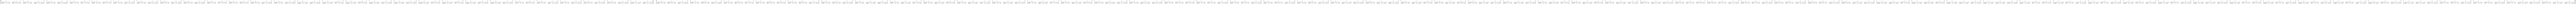

In [40]:
res=cpropagator.generate_propagator_basis(2, power=2, combination_order=3,for_display=False)
cpropagator.generate_propagator_basis(2, power=2, combination_order=3,for_display=True)

In [43]:
#is there some reason i can not have powers of 4 in the causal space (which become 3 in the other space)
import operator
int_res = cpropagator.__eval_combinations__(res)

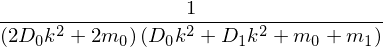

In [108]:
A=int_res[1][2]
A

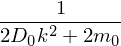

In [109]:
A = A.as_ordered_factors()[0]
A

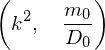

In [97]:
B = simplify(A/A.coeff(Symbol("k")**2))#.as_powers_dict()
#1 collect the common integer coefficient and store it somewhere - later we will devided everything by product of these
#identify the mass term and the momentum term, divide mass by the momentum coefficient
B.args

In [237]:
class kpropagator(object):
    #in this form it should be completely parametric - we should be able to create the Gamma representation on Gamma functions that can be evaluated
    def __init__(self, A):
        self.A = A
        self.num = A.as_numer_denom()[0]
        self.denom = A.as_numer_denom()[-1]
        self.poly = Poly(self.denom, Symbol("k"))
        self.nu = abs(A.args[1])
        self.p = int(Poly(self.num, Symbol("k")).degree() / 2) # i dont know if this is right either on the sympy side or on the maths side
        
    def __validate__(self):
        #assert some things here - things we assume
        return True
    
    @property
    def normed_mass(self):
        c = PP.all_coeffs()
        #divide the highest order which is 2 and the 0th order which is the constant - this take the coefficient of k2 and "norms" the mass which is everything not in k2
        #we should not have any other powers of k unless we are doing something shifty
        return c[-1]/c[0] 

    @property
    def gamma_representation(self):
        #return formula in gamma functions and unit sphere - i think this is just for fun because i can go all the way under assumption of standard form kprop
        pass 
    
    def _is_in_projective_space_(form):#conventional thing to say if we need to intragate out things called alpha_
        #if it has alpha parameters
        pass
     
    @property
    def integrate(self):
        gamma_rep = self.gamma_representation()
        #in here we check if there are any alpha params and we get rid of them - if there is only one, we do it the easy way
        if kpropagator._is_in_projective_space_(gamma_rep):pass
        
        return gamma_rep     
    
    def __repr__(self):  return self._repr_latex_()  
    def _repr_latex_(self):   return latex(self.A,  mode='inline')
    

In [247]:
myp = int_res[0][18]
#the general graph will structure the propagators - an option to extract numerical coefficients as a seperate term will be included
kpropagator(myp).nu

In [ ]:
sample = res[0][-1]
[s.display() for s in sample]

In [ ]:
residual_base = reduce(operator.mul, [p.value for p in sample], 1)
res = residual_base /sample[1].value
res
diff(res,Symbol("\omega"))

In [ ]:
def residues(pset,return_smallest=True):
    def _diff_(s,o):return s
    sets = {1:[], -1:[]}
    residual_base = reduce(operator.mul, [p.value for p in pset], 1)
    for p in pset:
        d = {"pole":p.pole}
        d["order"] = p.pole_order
        d["residual"] = simplify(residual_base / p.value)
        if p.pole_order > 1:d["residual"]= diff(residual_base / p.pole,Symbol("\omega"))
        d["causal_type"] = p.causal_type
        d["integration"] = d["residual"].subs(Symbol("\omega"),p.pole)
        sets[d["causal_type"]].append(d)
    return sets[1] if len(sets[1]) < len(sets[-1]) else sets[-1]
    
residues(sample)#[0]["residual"]

In [ ]:
causal_partition(sample)[0]["integration"]

In [ ]:
def do_integration(thing):
    ps = pole_structure(thing)
    #find the set whuch has the lowest power and smallest set cardinality
    #evalaute the remaining propagator product for all poles in this chose set and take the sum of the residues
    return ps
 
#in this one I am going to check that we can choose the easiest or most condenses residue sum and then see what the form is in terms of the original propagators
#of particular interest is when we have multiple inputs i.e. multiple poles to evalaute residues for - and how these simplify down

In [ ]:
#IS it possible to understand the choice of evaluation in terms of cuts on trees and then construct the equations for the residues that way?
#is there a strategy when choosing linearly r planar indepent momenta on edges
#we need to consider worst case sceario residue sums and what they look like. How bad does it get in practice or are there "loop holes"
#if it were to result in tensor integrals a) what does that mean and b) we know we can deal with those anyway
#surely there only ever has to be one "loop" edge that orientates are pole anyway? - the idea would be to express all others in terms of this k and some ps
#os this true for both K and omega. I think so
#COMPARE the terms in the residual SUMS with the GRAPH POLYMOMIAL - Maybe there a simple way to plug in omega??

In [4]:
from sympy import *

In [5]:
p1, p2, p3, p4 = symbols("p1 p2 p3 p4")
q1, q2 , k = symbols("q1 q2 k")
c1 = Eq(p1+p2+p3+p4)
c2 = Eq(q1+p1+k)
c3 = Eq(q2+p2+k)
c4 = Eq(q1+q2+p3+p4)

In [29]:
solve([c1,c2,c3,c4])

In [32]:
#extend function to create my Gamma functions
#http://docs.sympy.org/latest/modules/functions/index.html
Function("\Gamma")(3)